Testing output pkl files

In [2]:
import os, sys
import glob
sys.path.append('functionScripts')

import classifyFunctions

def find_files(directory, file_name):
    matches = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file == file_name:
                matches.append(os.path.join(root, file))
    return matches

directory = 'C:\OneDrive\KwanLab\Lightsheet_cFos_Pipeline\Temp\\'
file_name = 'Real_outdata.pkl'

found_files = find_files(directory, file_name)
print(f'done, found files: {len(found_files)}')

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


done, found files: 10


In [3]:
import re

def extract_substring_regex(text, start_marker, end_marker):
    pattern = re.compile(re.escape(start_marker) + "(.*?)" + re.escape(end_marker))
    match = pattern.search(text)
    if match:
        return match.group(1)
    else:
        return None

modelStr: data=count_norm-5HT2A


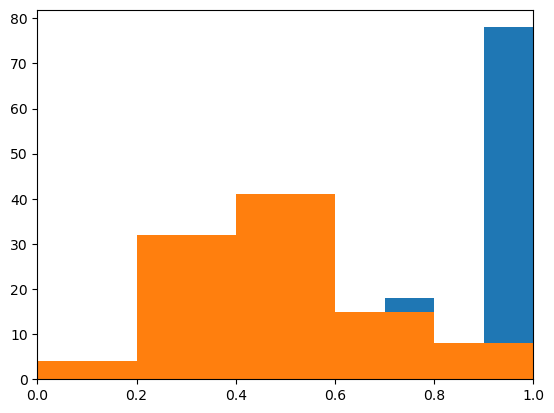

modelStr: data=count_norm-5HTR


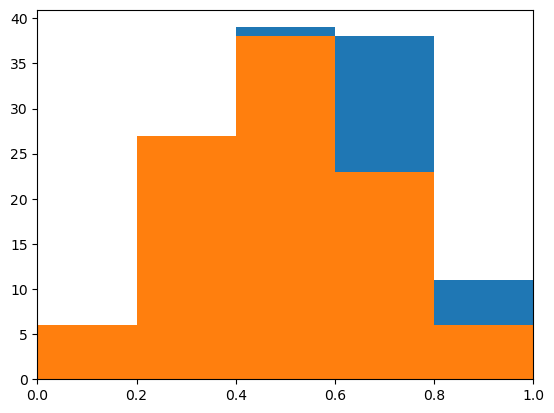

modelStr: data=count_norm-drug


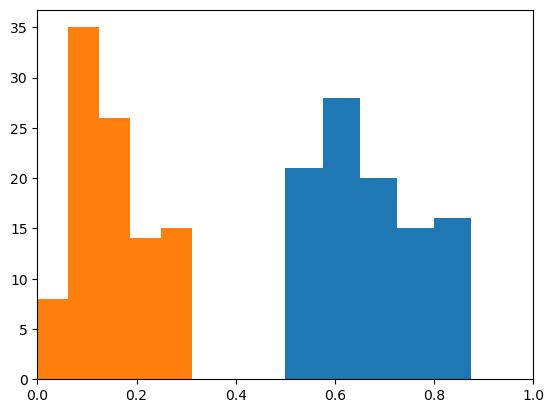

modelStr: data=count_norm-DT


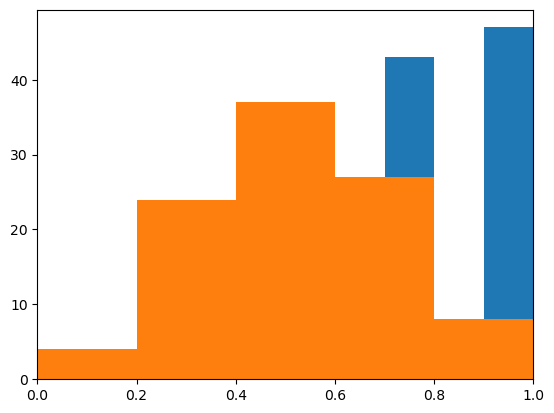

modelStr: data=count_norm-Psi5MEO


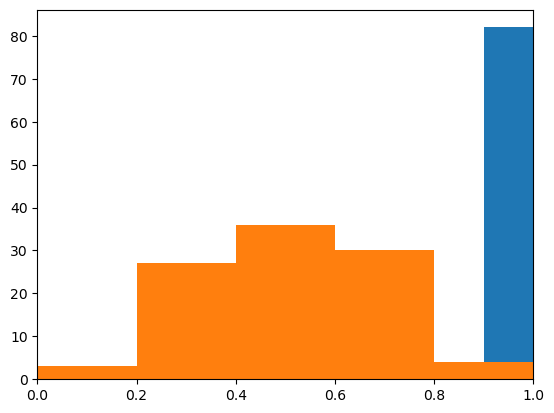

modelStr: data=count_norm-PsiDF


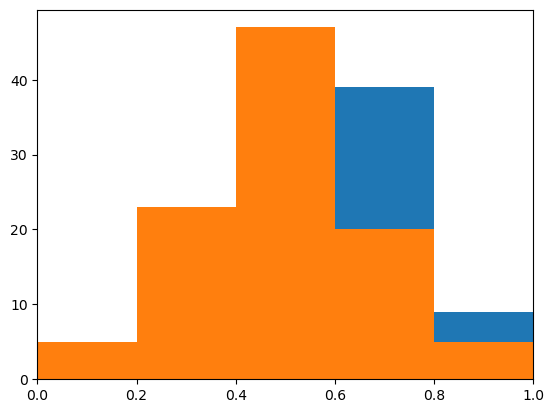

modelStr: data=count_norm-PsiKet


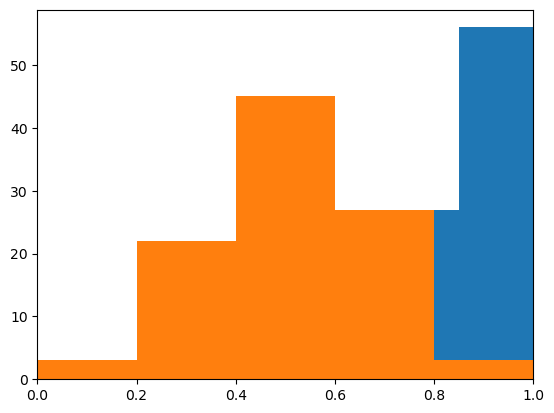

modelStr: data=count_norm-PsiMDMA


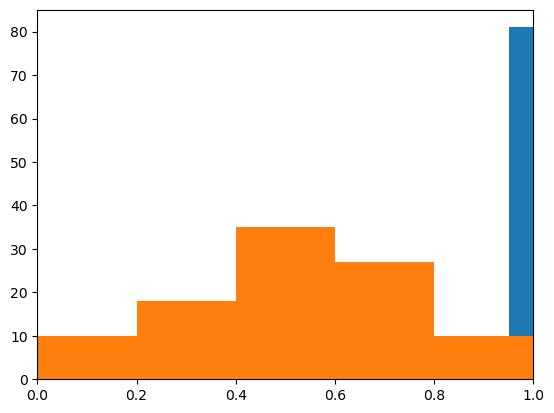

modelStr: data=count_norm-PsiSSRI


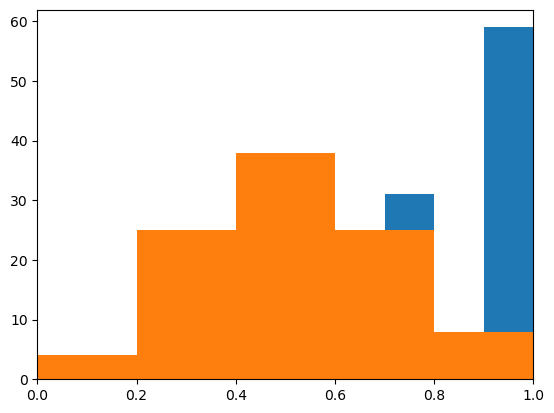

modelStr: data=count_norm-SSRI


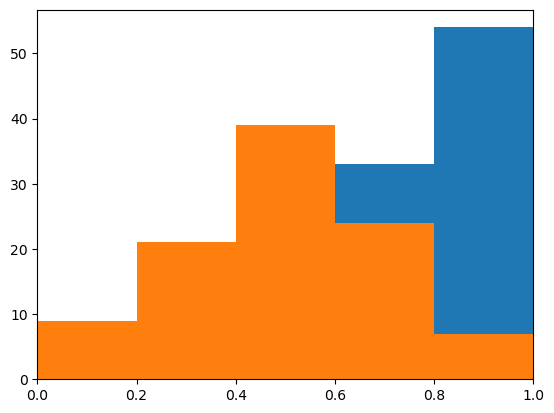

In [4]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

for saveFilePath in found_files:
    
    with open(saveFilePath, 'rb') as f:                 # Unpickle the data:
        [classifyDict, modelList, modelStr, saveStr, featureSelSwitch, y_real, y_prob, conf_matrix_list_of_arrays, X_test_trans_list, scores, selected_features_list, selected_features_params, baseline_val, shap_values_list] = pkl.load(f)

    print('modelStr:', saveFilePath.split('\\')[5])
    # print('scores', scores)

    # Plot a histogram of the scores
    plt.hist(scores, bins = 5)
    plt.xlim(0, 1)

    saveFilePathScramble = saveFilePath.replace('Real', 'Shuffle')

    with open(saveFilePathScramble, 'rb') as f:                 # Unpickle the data:
        [classifyDict, modelList, modelStr, saveStr, featureSelSwitch, y_real, y_prob, conf_matrix_list_of_arrays, X_test_trans_list, scores, selected_features_list, selected_features_params, baseline_val, shap_values_list] = pkl.load(f)

    # print('modelStr:', modelStr)
    # print('scores', scores)

    # Plot a histogram of the scores
    # Filter out the scores which are none
    scores = [score for score in scores if score is not None]

    plt.hist(scores, bins = 5)
    plt.xlim(0, 1)
    plt.show()